In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Datasets/Kaggle/Heart_data.csv"
df = pd.read_csv(path)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,Female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,Female,0,120,354,0,1,163,1,0.6,2,0,2,1


**Renaming Columns**

In [ ]:
df.rename(columns = {'age':'Age', 'sex':'Sex', 'cp':'Chest_Pain', 'trestbps':'Resting_Blood_Pressure', 'chol':'Cholesterol',
                     'fbs':'Fasting_Blood_Sugar', 'restecg':'ECG_results', 'thalach':'Max_heart_rate', 'exang':'Exercise_Induced_Angina',
                     'oldpeak':'ST_depression', 'slope':'ST_slope', 'ca':'Vessels_colored', 'thal':'Thalessemia_types', 'target':'Target'}, inplace = True)
df.head()

,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Cholesterol,Fasting_Blood_Sugar,ECG_results,Max_heart_rate,Exercise_Induced_Angina,ST_depression,ST_slope,Vessels_colored,Thalessemia_types,Target
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,Female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,Female,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#Checking for null values
null_values = df.isnull().sum()
print(null_values)

Age                        0
Sex                        0
Chest_Pain                 0
Resting_Blood_Pressure     0
Cholesterol                0
Fasting_Blood_Sugar        0
ECG_results                0
Max_heart_rate             0
Exercise_Induced_Angina    0
ST_depression              0
ST_slope                   0
Vessels_colored            0
Thalessemia_types          0
Target                     0
dtype: int64


In [ ]:
df.describe()

,Age,Chest_Pain,Resting_Blood_Pressure,Cholesterol,Fasting_Blood_Sugar,ECG_results,Max_heart_rate,Exercise_Induced_Angina,ST_depression,ST_slope,Vessels_colored,Thalessemia_types,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


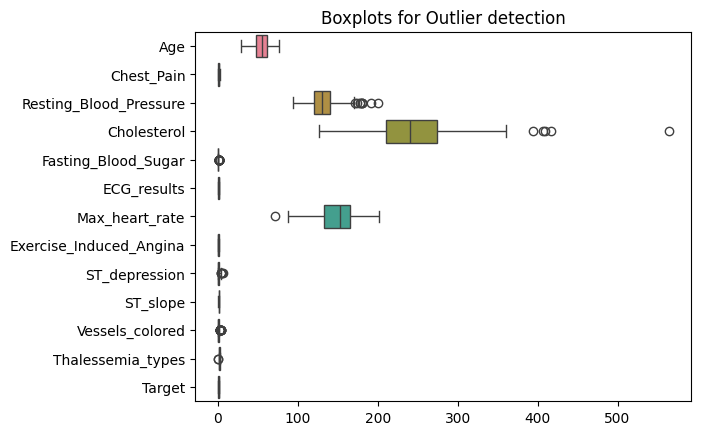

In [ ]:
num_cols = df.select_dtypes(include=['int', 'float']).columns
sns.boxplot(data = df[num_cols], orient = 'h')
plt.title("Boxplots for Outlier detection")
plt.show()

**As per observation, Males record to have more association with Coronary Artery Disease**

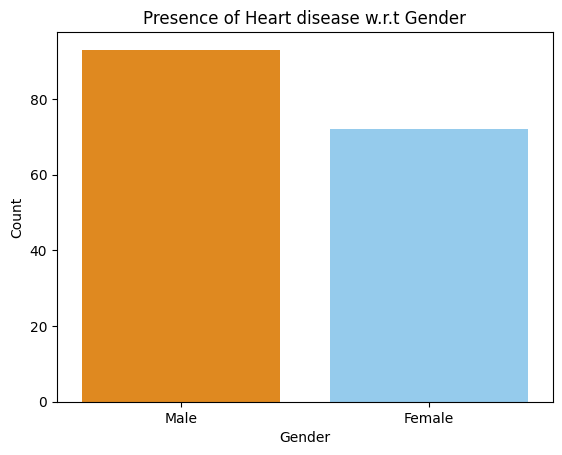

In [ ]:
sns.countplot(data = df[df['Target'] == 1], x = 'Sex', hue = 'Sex', palette = ['darkorange', 'lightskyblue'])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Presence of Heart disease w.r.t Gender")
plt.show()

**As per observation, the age group of 50-60 show a significant amount of Choslesterol level**

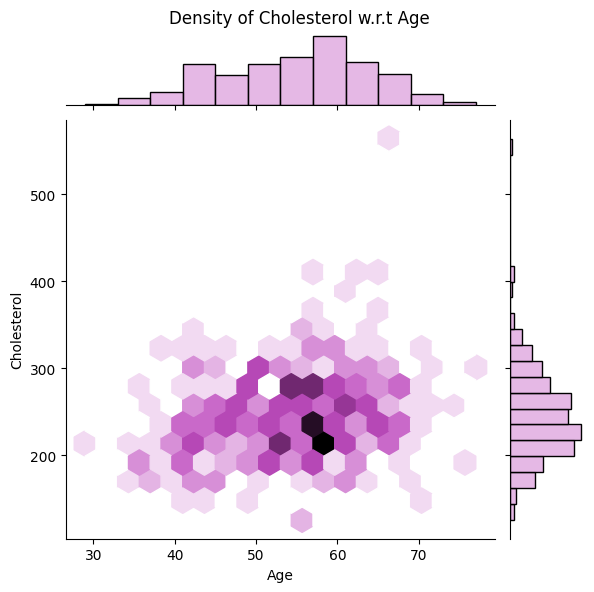

In [ ]:
sns.jointplot(data = df, x = 'Age', y = 'Cholesterol', kind = "hex", color = "plum")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.suptitle('Density of Cholesterol w.r.t Age')
plt.subplots_adjust(top=0.94)
plt.show()

****

**As per observation, more number of people between the age group of 50-65 are associated with Heart Disease**

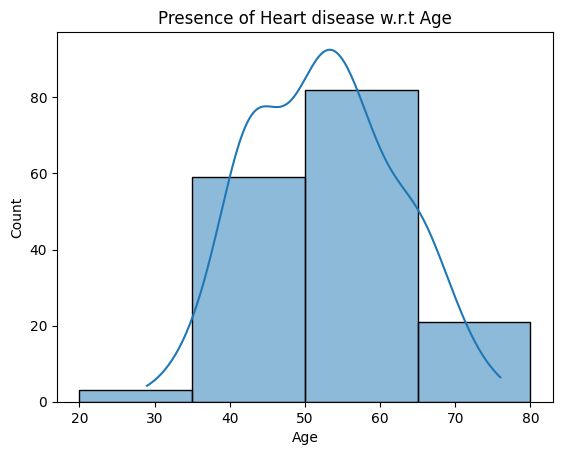

In [ ]:
sns.histplot(data = df[df['Target'] == 1], x = 'Age', bins = [20, 35, 50, 65, 80], kde = True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Presence of Heart disease w.r.t Age")
plt.show()

In [ ]:
mean_trestbps = df.groupby('Target')['Resting_Blood_Pressure'].mean()
#median_trestbps = df.groupby('target')['trestbps'].median()
mean_trestbps.reset_index()

,Target,Resting_Blood_Pressure
0,0,134.398551
1,1,129.303030


**The Typical Angina type Chest pain i.e 1 have more chances of having Heart Disease**

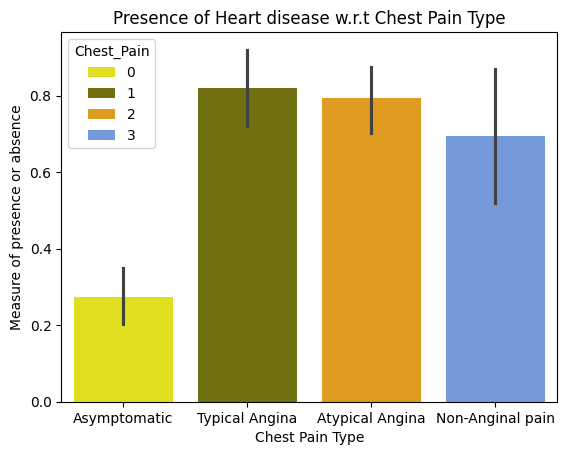

In [ ]:
sns.barplot(data = df, x = df['Chest_Pain'], y = df['Target'], hue = 'Chest_Pain', palette = ['yellow', 'olive', 'orange', 'cornflowerblue'])
plt.xlabel("Chest Pain Type")
plt.ylabel("Measure of presence or absence")
plt.title("Presence of Heart disease w.r.t Chest Pain Type")
plt.xticks(ticks=[0, 1, 2, 3], labels=['Asymptomatic', 'Typical Angina', 'Atypical Angina', 'Non-Anginal pain'])
plt.show()

**Individuals with exercise-induced angina have a lower maximum heart rate compared to those without the condition**

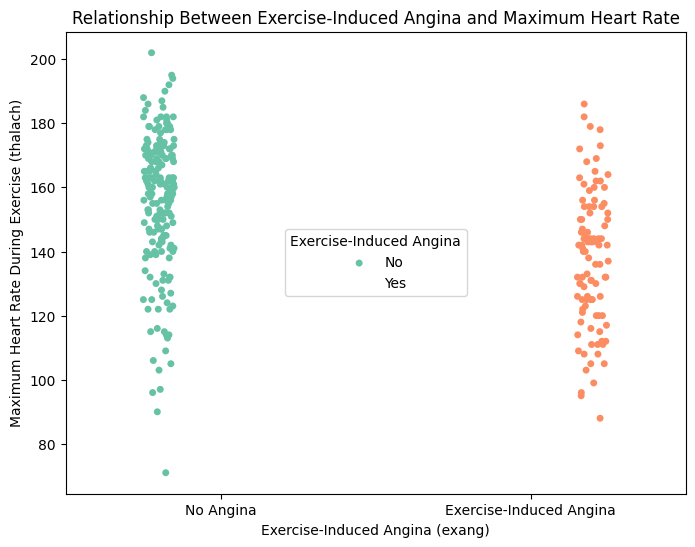

In [ ]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='Exercise_Induced_Angina', y='Max_heart_rate', data=df, hue='Exercise_Induced_Angina', palette='Set2', dodge = True)
plt.xlabel('Exercise-Induced Angina (exang)')
plt.ylabel('Maximum Heart Rate During Exercise (thalach)')
plt.title('Relationship Between Exercise-Induced Angina and Maximum Heart Rate')
plt.legend(title='Exercise-Induced Angina', labels=['No', 'Yes'], loc = "center")
plt.xticks(ticks=[0, 1], labels=['No Angina', 'Exercise-Induced Angina'])
plt.show()

When someone has exercise-induced angina, thier heart is under stress during physical activity which might limit their maximum heart rate to avoid overstraining the heart. This is a protective mechanism to prevent severe cardiac events, such as heart attacks. **Hence, this observation below aligns with medical knowledge about heart disease.**

In [ ]:
angina = df[df['Exercise_Induced_Angina'] == 1]['Max_heart_rate']
no_angina = df[df['Exercise_Induced_Angina'] == 0]['Max_heart_rate']

angina_mean = angina.mean()
angina_no_mean = no_angina.mean()

print(f"Mean of Heart rate in people with angina: {angina_mean}")
print(f"Mean of Heart rate in people without angina: {angina_no_mean}")

Mean of Heart rate in people with angina: 137.21212121212122
Mean of Heart rate in people without angina: 155.6813725490196


**Performing T test for further validation**

In [ ]:
t_stat, p_value = ttest_ind(a = angina, b = no_angina, equal_var = False)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
  print("We reject the null hypothesis that is the difference in heart rates between the two groups is statistically significant")
else:
  print("We fail to reject the null hypothesis that is the difference in heart rates between the two groups is statistically insignificant")

T-statistic: -7.128177921857431
P-value: 1.9037161774425142e-11
We reject the null hypothesis that is the difference in heart rates between the two groups is statistically significant


In [ ]:
df['ST_slope'].unique()

array([0, 2, 1])

**As per observation, this typically represents that Slope-2 or Downsloping shows more chances of the presence of Coronary artery disease**

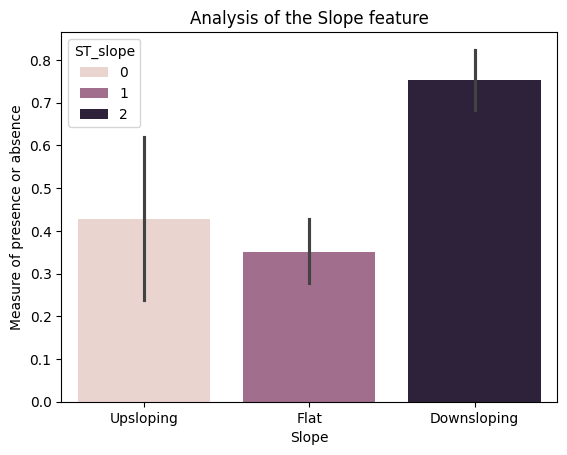

In [ ]:
sns.barplot(data = df, x = df['ST_slope'], y = df['Target'], hue = 'ST_slope')
plt.xlabel("Slope")
plt.ylabel("Measure of presence or absence")
plt.title("Analysis of the Slope feature")
plt.xticks(ticks = [0, 1, 2], labels = ['Upsloping', 'Flat', 'Downsloping'])
plt.show()

In [ ]:
pd.crosstab(df['Target'], df['ECG_results'])

ECG_results,0,1,2
Target,,,
0,79,56,3
1,68,96,1


**As per observation, it shows that the ECG type-1 shows more presence of Heart Disease**

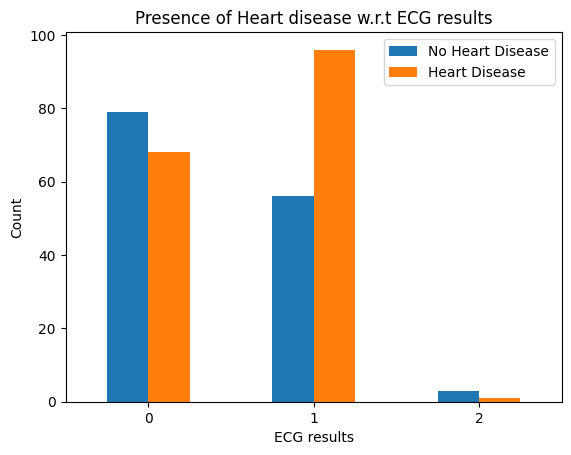

In [ ]:
pd.crosstab(df['ECG_results'], df['Target']).plot(kind = "bar")
plt.xlabel("ECG results")
plt.ylabel("Count")
plt.legend(["No Heart Disease", "Heart Disease"])
plt.title("Presence of Heart disease w.r.t ECG results")
plt.xticks(rotation = 0)
plt.show()

**As per observation, it shows that the Thalessemia type-2 shows more presence of Heart Disease**

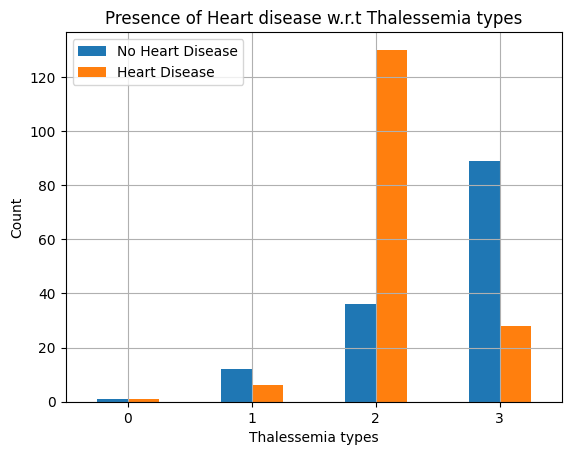

In [ ]:
pd.crosstab(df['Thalessemia_types'], df['Target']).plot(kind = "bar")
plt.xlabel("Thalessemia types")
plt.ylabel("Count")
plt.legend(["No Heart Disease", "Heart Disease"])
plt.title("Presence of Heart disease w.r.t Thalessemia types")
plt.xticks(rotation = 0)
plt.grid()
plt.show()

In [ ]:
new_df = df.drop('Target', axis = 1)
target = df[['Target']]
new_df['Sex'] = new_df.Sex.map({"Male" : 1, "Female" : 0})
new_df.head()

,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Cholesterol,Fasting_Blood_Sugar,ECG_results,Max_heart_rate,Exercise_Induced_Angina,ST_depression,ST_slope,Vessels_colored,Thalessemia_types
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


**Train Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_df, target, test_size = 0.2, random_state = 30)

In [ ]:
print("Size of X_train is: ", X_train.shape)
print("Size of X_test is: ", X_test.shape)
print("Size of y_train is: ", y_train.shape)
print("Size of y_test is: ", y_test.shape)

Size of X_train is:  (242, 13)
Size of X_test is:  (61, 13)
Size of y_train is:  (242, 1)
Size of y_test is:  (61, 1)


**Feature Selection using Information Gain technique**

In [ ]:
mutual_info_score = mutual_info_classif(X_train, y_train)
mutual_info_score

array([0.01488079, 0.04261402, 0.09955932, 0.        , 0.0197637 ,
       0.        , 0.0084458 , 0.09667651, 0.13357041, 0.07378568,
       0.08096144, 0.1002136 , 0.15635438])

In [ ]:
mutual_info_score = pd.Series(mutual_info_score)
mutual_info_score.index = X_train.columns
mutual_info_score.sort_values(ascending = False)
print(mutual_info_score)

Age                        0.014881
Sex                        0.042614
Chest_Pain                 0.099559
Resting_Blood_Pressure     0.000000
Cholesterol                0.019764
Fasting_Blood_Sugar        0.000000
ECG_results                0.008446
Max_heart_rate             0.096677
Exercise_Induced_Angina    0.133570
ST_depression              0.073786
ST_slope                   0.080961
Vessels_colored            0.100214
Thalessemia_types          0.156354
dtype: float64


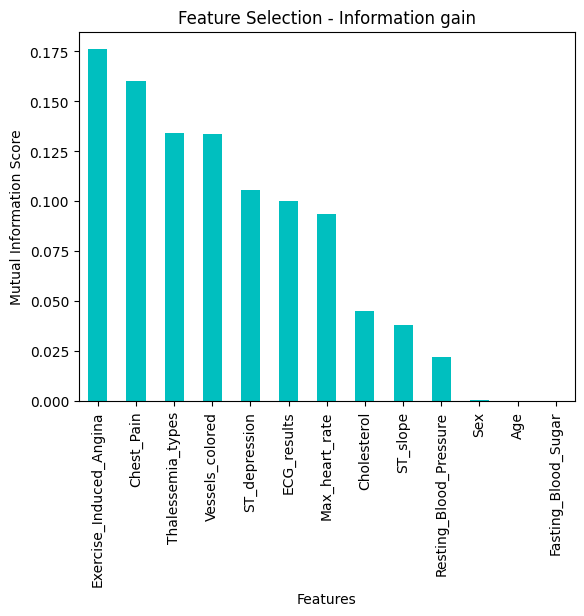

<Figure size 1000x500 with 0 Axes>

In [ ]:
mutual_info_score.sort_values(ascending = False).plot(kind = "bar", color = 'c')
plt.xticks(rotation = 90)
plt.xlabel("Features")
plt.ylabel("Mutual Information Score")
plt.title("Feature Selection - Information gain")
plt.figure(figsize = (10, 5))
plt.show()

**Logistic Regression**

In [ ]:
model = LogisticRegression()

#Training the model
model.fit(X_train, y_train)

y_predicted_lr = model.predict(X_test)

In [ ]:
y_predicted_lr.shape

(61,)

In [ ]:
lr_score = round(accuracy_score(y_test, y_predicted_lr)*100, 2)
print("The Accuracy score of the model achieved using Logistic Regression is: ", lr_score)

The Accuracy score of the model achieved using Logistic Regression is:  85.25


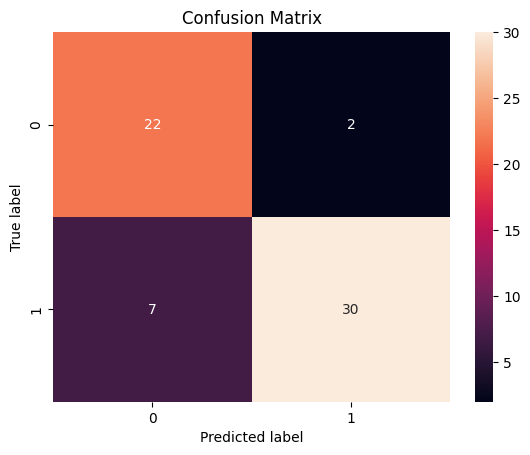

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted_lr)
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

**Classification Report**

In [ ]:
print(classification_report(y_test, y_predicted_lr))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83        24
           1       0.94      0.81      0.87        37

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61



**Decision Tree Classifier**

In [ ]:
model = DecisionTreeClassifier()

#Training the model
model.fit(X_train, y_train)

y_predicted_dt = model.predict(X_test)

In [ ]:
y_predicted_dt.shape

(61,)

In [ ]:
dt_score = round(accuracy_score(y_test, y_predicted_dt)*100,2)
print("The Accuracy score of the model achieved using Decision Tree is: ", dt_score)

The Accuracy score of the model achieved using Decision Tree is:  73.77


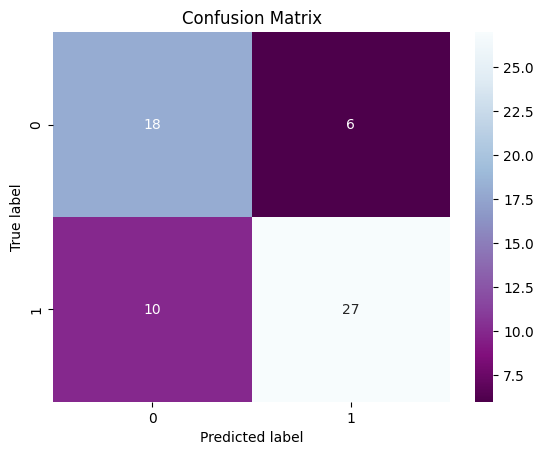

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted_dt)
sns.heatmap(cm, annot = True, cmap = plt.cm.BuPu_r)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(y_test, y_predicted_dt))

              precision    recall  f1-score   support

           0       0.64      0.75      0.69        24
           1       0.82      0.73      0.77        37

    accuracy                           0.74        61
   macro avg       0.73      0.74      0.73        61
weighted avg       0.75      0.74      0.74        61



**Random Forest Classifier**

In [ ]:
max_acc = 0

for i in range(200):
  model = RandomForestClassifier(random_state = i)
  model.fit(X_train, y_train)
  y_predicted_rf = model.predict(X_test)
  current_acc = round(accuracy_score(y_test, y_predicted_rf)*100, 2)
  if current_acc > max_acc:
    max_acc = current_acc
    best_rs = i

#Training the model with the best random_state
model = RandomForestClassifier(random_state = best_rs)
model.fit(X_train, y_train)
y_predicted_rf = model.predict(X_test)
rf_score = round(accuracy_score(y_test, y_predicted_rf)*100, 2)
print("The Accuracy score of the model achieved using Random Forest is: ", rf_score)

The Accuracy score of the model achieved using Random Forest is:  86.89


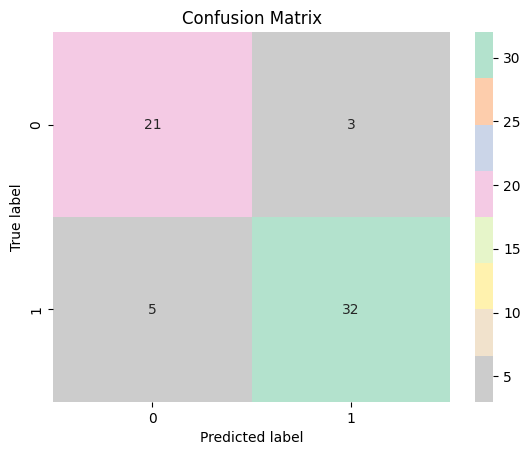

In [ ]:
cm = confusion_matrix(y_test, y_predicted_rf)
sns.heatmap(cm, annot = True, cmap = plt.cm.Pastel2_r)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

**Classification Report**

In [ ]:
print(classification_report(y_test, y_predicted_rf))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        24
           1       0.91      0.86      0.89        37

    accuracy                           0.87        61
   macro avg       0.86      0.87      0.86        61
weighted avg       0.87      0.87      0.87        61



**K Nearest Neighbors**

In [ ]:
model = KNeighborsClassifier(n_neighbors=7)
#Training the model

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

model.fit(X_train,y_train)

y_predicted_knn = model.predict(X_test)

In [ ]:
y_predicted_knn.shape

(61,)

In [ ]:
knn_score = round(accuracy_score(y_test, y_predicted_knn)*100, 2)
print(f"The Accuracy score of the model achieved using KNN is: {knn_score}")

The Accuracy score of the model achieved using KNN is: 83.61


**Classification Report**

In [ ]:
print(classification_report(y_test, y_predicted_knn))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        24
           1       0.86      0.86      0.86        37

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



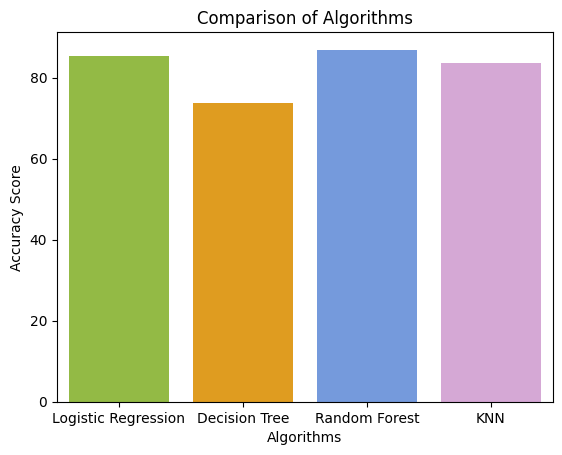

In [ ]:
algos = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN']
scores = [lr_score, dt_score, rf_score, knn_score]
sns.barplot(x = algos, y = scores, palette = ['yellowgreen', 'orange', 'cornflowerblue', 'plum'])
plt.title("Comparison of Algorithms")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.show()

**Using Pearson's Correlation**

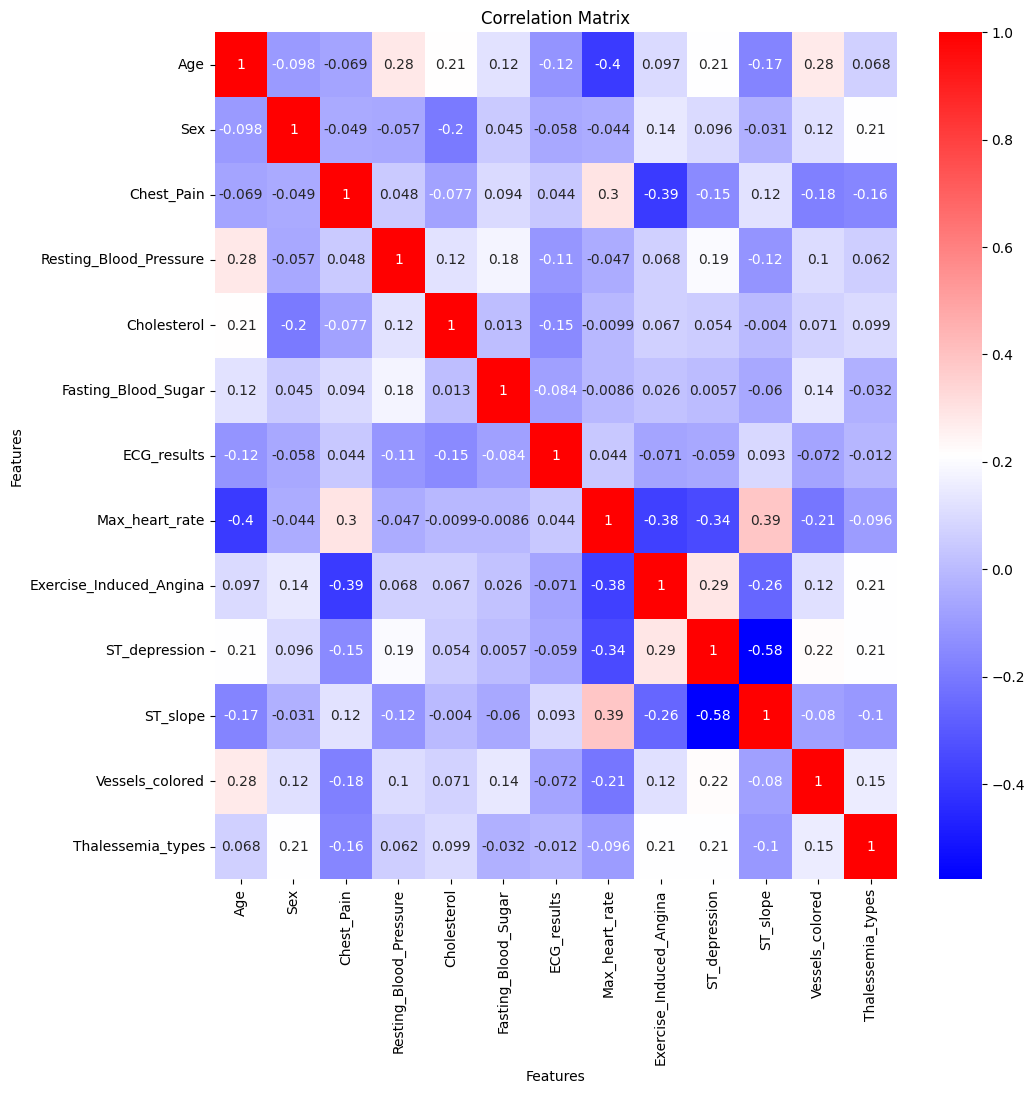

In [ ]:
df2 = df
df2['Sex'] = df['Sex'].map({"Male" : 1, "Female" : 0})
cor = new_df.corr()
plt.figure(figsize = (11, 11))
#sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)
sns.heatmap(cor, annot = True, cmap = "bwr", fmt = ".2g")
plt.xlabel("Features")
plt.ylabel("Features")
plt.title("Correlation Matrix")
plt.show()